# SI 618 - Homework #3: Data Visualization

Version 2021.04.16.1.CT

## Background

This homework assignment focuses on the visual analysis of the COVID-19 data avaiable here: https://covid19datahub.io/articles/api/python.html. A description of the dataset can be found at https://covid19datahub.io/articles/doc/data.html

Your main task in this assignment is to explore the data *using the data manipulation, analysis, and visualization methods we covered in class* as well as those in the assigned readings.  You may need to consult pandas, matplotlib and seaborn documentation, as well as Stack Overflow, or other online resources.  

## Total Points and Rubric

Each question is worth the same number of points.  Points will be allocated according to the following rubric:

- 90-100%: Question is correctly and completely answered.  Answer consists of well-written code that conforms to [PEP 8](https://www.python.org/dev/peps/pep-0008/) guidelines and is 
accompanied by a written interpretation in a Markdown block.  Written interpretation does not contain spelling, grammar or stylistic errors (see https://faculty.washington.edu/heagerty/Courses/b572/public/StrunkWhite.pdf for a detailed specifications).  Minor problems, such as formatting, incorrect submissions, missing names, etc. will result in less than 100%.
- 75-85% : Answer is mostly complete and correct; two or fewer noticeable omissions or errors.  Minor stylistic flaws, either in code or in 
written interpretation.
- 50-70%: Answer has significant omissions or errors; Noticeable departure from PEP-8 guildelines and/or moderate spelling, grammar, or style issues
in written interpretations.
- 25-45%: Question is perfunctorily attempted.  Substantial parts are missing or incorrect.
- 0 points: Question not attempted.

## Getting the data

We used the COVID-19 datahub via R in SI 544 last semester and we will be using the python equivalent in this homework assignment.

The following cell should install the most up-to-date version of the 
COVID-19 datahub:

In [1]:
pip install --upgrade covid19dh

Requirement already up-to-date: covid19dh in /Users/nathanielmay/opt/anaconda3/lib/python3.8/site-packages (2.3.0)
Note: you may need to restart the kernel to use updated packages.


In [2]:
%matplotlib inline

### Restart the kernel to import the module and access the data

In [3]:
from covid19dh import covid19
data, src = covid19()

We have invested a lot of time and effort in creating COVID-19 Data Hub, please cite the following when using it:

	Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.

A BibTeX entry for LaTeX users is

	@Article{,
		title = {COVID-19 Data Hub},
		year = {2020},
		doi = {10.21105/joss.02376},
		author = {Emanuele Guidotti and David Ardia},
		journal = {Journal of Open Source Software},
		volume = {5},
		number = {51},
		pages = {2376},
	}

To hide this message use 'verbose = False'.


In [4]:
data.head()

,id,date,vaccines,tests,confirmed,recovered,deaths,hosp,vent,icu,...,currency,administrative_area_level,administrative_area_level_1,administrative_area_level_2,administrative_area_level_3,latitude,longitude,key,key_apple_mobility,key_google_mobility
0,AFG,2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,AFN,1,Afghanistan,NaN,NaN,33.0,65.0,NaN,NaN,AF
1,AFG,2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,AFN,1,Afghanistan,NaN,NaN,33.0,65.0,NaN,NaN,AF
2,AFG,2020-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,AFN,1,Afghanistan,NaN,NaN,33.0,65.0,NaN,NaN,AF
3,AFG,2020-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,AFN,1,Afghanistan,NaN,NaN,33.0,65.0,NaN,NaN,AF
4,AFG,2020-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,AFN,1,Afghanistan,NaN,NaN,33.0,65.0,NaN,NaN,AF


## Answer the questions below. 
For each question, you should
1. Write code that can help you answer the following questions, and
2. Explain your answers in plain English. You should use complete sentences that would be understood by an educated professional who is not necessarily a data scientist (like a product manager).

In [5]:
# Load all the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### <font color='#8B0000'> Q1 How many different countries are represented in the country-level data set?</font>
- Refer to the documentation to call the covid19() function with appropriate parameters (https://covid19datahub.io/articles/api/python.html)

In [6]:
# insert your code here
print(len(data.id.unique()))
print(len(set(data['id'])))
data.id.unique()
sum(data.groupby('id').max()['population']) / 7674000000


199
199


0.9843659712014595

While there is some debate around the number of coutries in the world, the consensus falls near 200. This dataset has **199** unique ISO codes which would represent almost the entire world. North Korea is notably missing. 

I also found the maximum population value for each country, and summed them to find the total population of all represented countries. I divided this by the current world population of 7.674 Billion and found taat 98.4% of the world population is represented. 

### <font color='#8B0000'> Q2 Create a line chart that shows the total number of cases over time.</font>

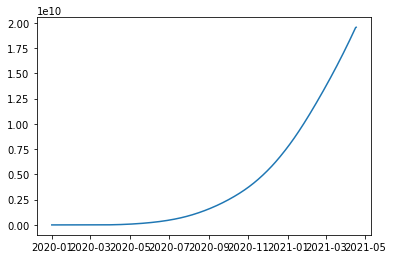

In [7]:
# just in case there are multiple rows per date
sum_by_date = data.groupby('date').sum().sort_values(by="date")

x = sum_by_date.index.values
y = sum_by_date['confirmed'].cumsum()

plt.plot(x,y)

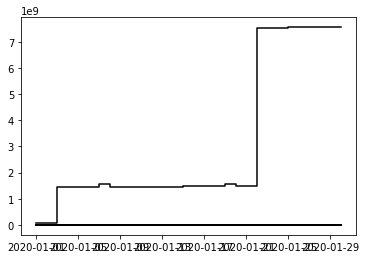

In [23]:
x2 = x[:30]
y2 = y[:30]
sum_by_date2 = sum_by_date[:30]


plt.plot(sum_by_date2, 'k-', drawstyle='steps-post', label='steps-post')

The number of cases has been increasing at an increasing rate. Case were low through the first half of 2020, but by July cases really started to accumlate rapidly. This rapid accelation lasted through the end of 2020. Since then the number of cases has continued to climb, but at a constant rate. 

### <font color='#8B0000'>Q3 Use the country-level data set to create a histogram to:</font>
- Show the distribution of values for the number of hospitalizations per 1000 people.  
- Draw a red vertical line that shows the median value on the histogram.

In [8]:
data[data.id == 'CAC'].dropna(subset=['hosp'])

,id,date,vaccines,tests,confirmed,recovered,deaths,hosp,vent,icu,...,currency,administrative_area_level,administrative_area_level_1,administrative_area_level_2,administrative_area_level_3,latitude,longitude,key,key_apple_mobility,key_google_mobility
13625,CAC,2020-04-20,NaN,4.0,0.0,0.0,0.0,1.0,NaN,NaN,...,NaN,1,Costa Atlantica,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13626,CAC,2020-04-21,NaN,4.0,1.0,0.0,0.0,1.0,NaN,NaN,...,NaN,1,Costa Atlantica,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13628,CAC,2020-04-23,NaN,61.0,48.0,0.0,0.0,34.0,NaN,NaN,...,NaN,1,Costa Atlantica,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13629,CAC,2020-04-24,NaN,127.0,91.0,0.0,0.0,48.0,NaN,NaN,...,NaN,1,Costa Atlantica,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13630,CAC,2020-04-25,NaN,335.0,148.0,0.0,0.0,91.0,NaN,NaN,...,NaN,1,Costa Atlantica,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13701,CAC,2020-07-05,NaN,NaN,149.0,148.0,0.0,1.0,NaN,NaN,...,NaN,1,Costa Atlantica,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13702,CAC,2020-07-06,NaN,NaN,149.0,148.0,0.0,1.0,NaN,NaN,...,NaN,1,Costa Atlantica,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13703,CAC,2020-07-07,NaN,NaN,149.0,148.0,0.0,1.0,NaN,NaN,...,NaN,1,Costa Atlantica,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13704,CAC,2020-07-08,NaN,NaN,149.0,148.0,0.0,1.0,NaN,NaN,...,NaN,1,Costa Atlantica,NaN,NaN,NaN,NaN,NaN,NaN,NaN


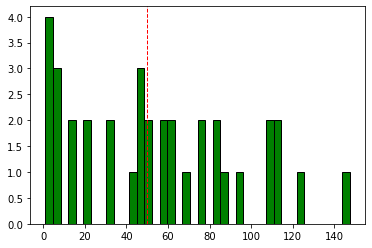

In [9]:

# ditch the nulls, sum by country
hosp_by_ISO = data.dropna(subset=['hosp']).groupby('id').sum()

# get the population by finding the max (presumes populations all grow) 
pops = data.groupby('id').max()[['population']]

# merge the population onto the sum of hopitalizations 
hosps_and_pops = hosp_by_ISO[['hosp']].merge(pops, how="left", left_index=True, right_index=True)

# calculate hospitalizations per 1000
hosps_and_pops['per_cap'] = 1000 * hosps_and_pops['hosp'] / hosps_and_pops['population']

# remove outlier from cruise ship
hosps_and_pops = hosps_and_pops[hosps_and_pops.per_cap < 500]

median = hosps_and_pops.per_cap.median()

result = plt.hist(hosps_and_pops.per_cap, bins=40, color='g', edgecolor='k')
plt.axvline(median, color='r', linestyle='dashed', linewidth=1)

In [10]:
# check number of coutries which provided hosp data
len(hosps_and_pops)

36

To create this histogram I had to remove 'Costa Atlantica', a cruise ship that resulted in an abnormally high hospitalizations per 1000 people. 

Of the remaining countries, only 36 countries provided hospitalization data. 

I was surpised that there was not a normal distribution. Instead, there is a roughly equal distribution of between 0 to 90 hospitalizations per 1000 people with a median near 40.

### <font color='#8B0000'> Q4 Create a visualization that shows the  number of tests per day in the United States and indicate the median value on your visualization.</font>

961371.5


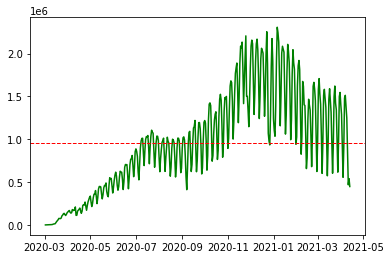

In [11]:
# USA data only, drop rows with no test data
usa = data[data.id == 'USA'].dropna(subset=['tests']).sort_values(by="date")

# Since tests were cumulative, a diff() from teh previous date was required
plt.plot(usa.date, usa['tests'].diff(), color='green')

median = usa['tests'].diff().median()
print(median)

plt.axhline(median, color='r', linestyle='dashed', linewidth=1)

Only the cumulative test count was given in the dataset, so I had to diff the daily total to the previous days. 

The median daily tests in this period is 879,856.

We can see that that testing was low in the first half of 2020. By the end of 2020, testing had grown well beyond its median, peaking in November, December 2020, and January 2021. Since then testing has dropped back below the median. 

## For questions below:
- You will have to call the covid19() function again **with parameters specific to Canada**. 
- Set the parameter <code>level = 2</code> in the call to covid19().

In [12]:
canada = covid19("CAN",level = 2)

We have invested a lot of time and effort in creating COVID-19 Data Hub, please cite the following when using it:

	Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.

A BibTeX entry for LaTeX users is

	@Article{,
		title = {COVID-19 Data Hub},
		year = {2020},
		doi = {10.21105/joss.02376},
		author = {Emanuele Guidotti and David Ardia},
		journal = {Journal of Open Source Software},
		volume = {5},
		number = {51},
		pages = {2376},
	}

To hide this message use 'verbose = False'.


### <font color='#8B0000'> Q5 Create a bar plot to show the number of tests conducted in each province.  </font>
Order the provinces from west to east (use your best judgement for cases where the order is unclear).  Which Canadian province that has conducted the most tests?

<BarContainer object of 13 artists>

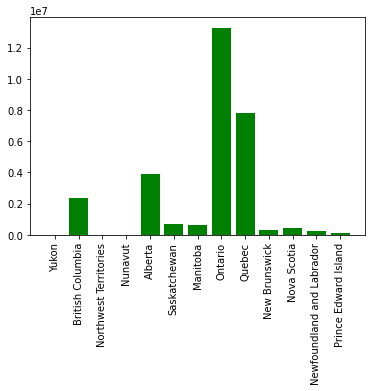

In [13]:
# sinces tests are cumulative, I just want the max
tests_and_pops = canada[0].groupby('administrative_area_level_2').max()[['tests']]

# manually reorder from east to west
eastbound = tests_and_pops.reindex(['Yukon',
'British Columbia',
'Northwest Territories',
'Nunavut',
'Alberta',
'Saskatchewan',
'Manitoba',
'Ontario',
'Quebec',
'New Brunswick',
'Nova Scotia',
'Newfoundland and Labrador',
'Prince Edward Island'])

ax = plt.gca()
plt.xticks(rotation = 90)
plt.bar(eastbound.index, eastbound.tests, color='green')


Ontario has conducted the most tests by more than double the next province or territory. 

### <font color='#8B0000'> Q6 Create a bar plot that shows the number of tests conducted per 1000 people for each province in Canada.</font>
How would you interpret the results of this bar plot given the results of bar plot in question 5. 

<BarContainer object of 13 artists>

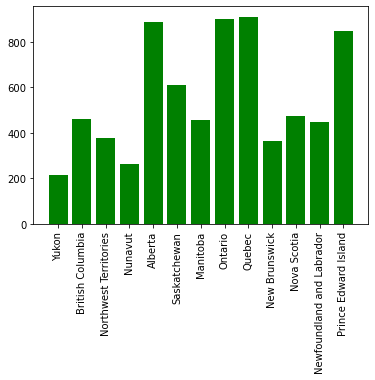

In [14]:
# sinces tests are cumulative, I just want the max
tests_and_pops = canada[0].groupby('administrative_area_level_2').max()[['tests', 'population']]

# Calculate tests per 1000 (unlike before I choose the population corresponding to the max tests)
tests_and_pops['per_cap'] = tests_and_pops['tests'] * 1000 / tests_and_pops['population']

# manually reorder from east to west
eastbound = tests_and_pops.reindex(['Yukon',
'British Columbia',
'Northwest Territories',
'Nunavut',
'Alberta',
'Saskatchewan',
'Manitoba',
'Ontario',
'Quebec',
'New Brunswick',
'Nova Scotia',
'Newfoundland and Labrador',
'Prince Edward Island'])


ax = plt.gca()
plt.xticks(rotation = 90)
plt.bar(eastbound.index, eastbound.per_cap, color='green')


Although Ontario had the highest number of tests overall, their testing per capita was on par with Alberta and Prince Edward Island. This implies that their population is much higher than the other provinces and territoties. 

### <font color='#8B0000'> Q7 Create a visualization that shows which Canadian province has the highest recovery rate. </font>
Recovery rate is calculated as the number of recovered cases divided by the number of confirmed cases.

<BarContainer object of 13 artists>

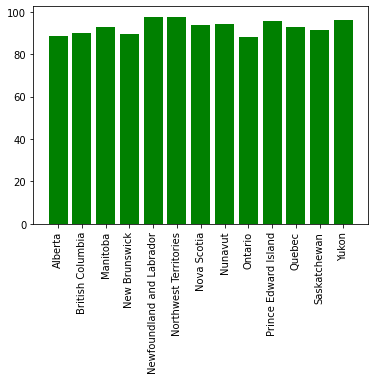

In [15]:
# both confirmed and recovered are cumulative so I think it's safe to extract the max for both
recovered = canada[0].dropna(subset=['recovered', 'confirmed']).groupby('administrative_area_level_2').max()

# calculate the recovery rate
recovered['recovery_rate'] = recovered['recovered'] * 100 / recovered['confirmed']

ax = plt.gca()
plt.xticks(rotation = 90)
plt.bar(recovered.index, recovered.recovery_rate, color='green')

Prince Edward Island has the highest recovery rate but most provinces and territories are in the ballpack. Newfoundland and Labrador sticks out with the lowerst recovery rate at about 55%.

### <font color='#8B0000'> Q8 Create visualizations that show the impacts of _at least_ three policy measures on mortality or infection rates.</font>


See https://covid19datahub.io/articles/doc/data.html for descriptions of the available policy measures.  You are not limited to histograms and bar charts.  Remember that you can use subplots!


In [16]:
# Canada data only
print(len(recovered.school_closing.unique()))
print(len(recovered.workplace_closing.unique()))
print(len(recovered.cancel_events.unique()))
print(len(recovered.gatherings_restrictions.unique()))
print(len(recovered.transport_closing.unique()))
print(len(recovered.stay_home_restrictions.unique()))
print(len(recovered.internal_movement_restrictions.unique()))
print(len(recovered.international_movement_restrictions.unique()))
print(len(recovered.information_campaigns.unique()))
print(len(recovered.testing_policy.unique()))
print(len(recovered.contact_tracing.unique()))
print(len(recovered.stringency_index.unique()))

1
2
1
1
1
1
1
1
1
1
1
1


Since Canada almost uniformly applies its policies I assume that this question wants me to investigate policy measures across all coutries

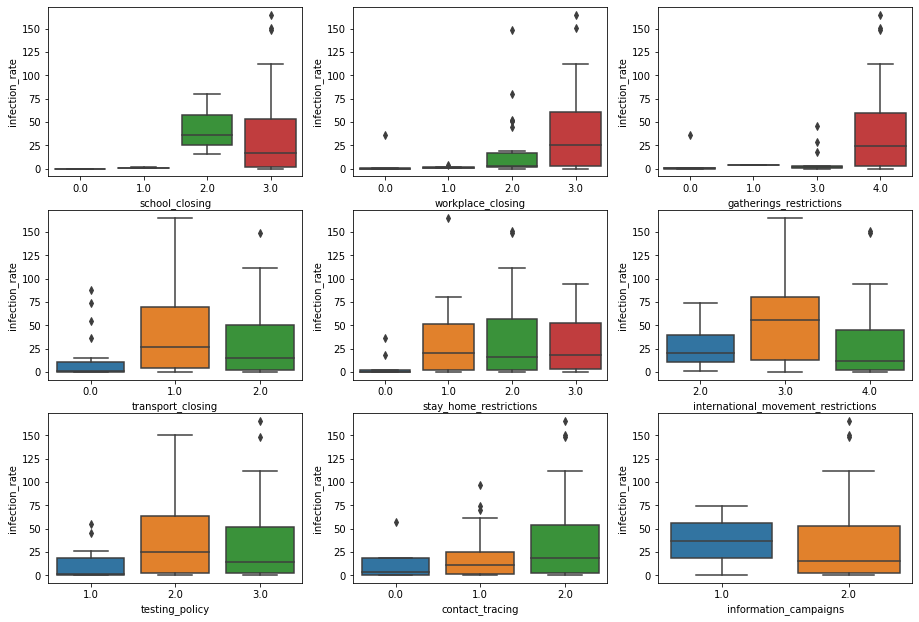

In [17]:
# both confirmed and recovered are cumulative so I think it's safe to extract the max for both
cases = data.dropna(subset=['population', 'confirmed']).groupby('id').max()

# calculate the recovery rate
cases['infection_rate'] = cases['confirmed'] * 1000 / cases['population']

cases

fig = plt.figure()
plt.subplots_adjust(left=2, bottom=2, right=4, top=4, wspace=None, hspace=None)
ax1 = fig.add_subplot(3, 3, 1)
sns.boxplot(x="school_closing",y="infection_rate",data=cases)
ax2 = fig.add_subplot(3, 3, 2)
sns.boxplot(x="workplace_closing",y="infection_rate",data=cases)
ax3 = fig.add_subplot(3, 3, 3)
sns.boxplot(x="gatherings_restrictions",y="infection_rate",data=cases)
ax4 = fig.add_subplot(3, 3, 4)
sns.boxplot(x="transport_closing",y="infection_rate",data=cases)
ax5 = fig.add_subplot(3, 3, 5)
sns.boxplot(x="stay_home_restrictions",y="infection_rate",data=cases)
ax6 = fig.add_subplot(3, 3, 6)
sns.boxplot(x="international_movement_restrictions",y="infection_rate",data=cases)
ax7 = fig.add_subplot(3, 3, 7)
sns.boxplot(x="testing_policy",y="infection_rate",data=cases)
ax8 = fig.add_subplot(3, 3, 8)
sns.boxplot(x="contact_tracing",y="infection_rate",data=cases)
ax9 = fig.add_subplot(3, 3, 9)
sns.boxplot(x="information_campaigns",y="infection_rate",data=cases)


Note: Some policies likely had low representation resulting in small boxes, so I will only address thos with a sufficient range to support their representation and thus effectiveness. 

My expectation was that the stricter the policy the lower the infecation rate. This was not purely the case.

School closings, transport closings, & international travel restrictions seem to be beneficial when implementing the strictest policies. 

Counterintuitively, workplace closings, gathering restrictions, contract tracing, and information campaigns seem to have an undesirable impact on infection rates. 

Testing and stay at home restrictions don't appear to have a mateial impact on infection rates.

What I take from this is that policies can not be applies across the board. Each country should choose a custom policy set that it appropriate for itself. 

## <font color='green'> Please submit your completed notebook in .IPYNB and .HTML formats via Canvas </font>